In [6]:
import numpy as np
from math import sqrt, cos, sin, pi
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib
from qutip import *

In [7]:
def normalize_(vector):
    return vector / sqrt(sum(vector[i,0]**2 for i in range(0,vector.shape[0])))

def concurrence_(vector):    #2 qubit pure state
    return 2*abs(vector[0,0]*vector[3,0] - vector[1,0]*vector[2,0])

#def CNOT(vector, control, target):
#    out = vector
#    for i in range(0,vector.shape[0]):
#        if int('{0:08b}'.format(i)[-3+control]) == 1:
#            out[int('{0:08b}'.format(i)[-3:-3+target-1] + str(int(not('{0:08b}'.format(i)[-3+target]))) + '{0:08b}'.format(i)[-3+target+1:], 2),0] = out[int(bin(i), 2),0]
#            out[int(bin(i), 2)] = 0
#    return normalize(out)

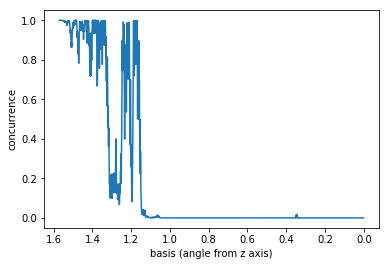

In [10]:
I = np.matrix([[1, 0],[0, 1]])
CNOT = np.matrix([ [1,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0] ])   #second qubit is control
CNOT3 = np.kron(CNOT, I)

con = []
r = np.arange(pi/2,0,-0.001)
GHZ = np.matrix([[1/sqrt(2)],[0],[0],[0],[0],[0],[0],[1/sqrt(2)]])
state = GHZ

for theta in r:
    b = cos(theta/2) * np.matrix([[1],[0]]) + sin(theta/2) * np.matrix([[0],[1]])
    b_opp = sin(theta/2) * np.matrix([[1],[0]]) - cos(theta/2) * np.matrix([[0],[1]])
    
    if not np.random.randint(2):
        k = np.kron(np.kron(b, I), I)
    else:
        k = np.kron(np.kron(b_opp, I), I)
        
    state_after = normalize_(k.H * state)
    con.append(concurrence_(state_after))
    
    state = CNOT3 * np.kron(np.matrix([[1], [0] ]), state_after)
    
plt.plot(r,con)
plt.xlabel('basis (angle from z axis)')
plt.ylabel('concurrence')
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.draw()

### Rewrite using Qutip, and do minor modification. Not using a new GHZ state everytime. Measurement outcome is always +1.

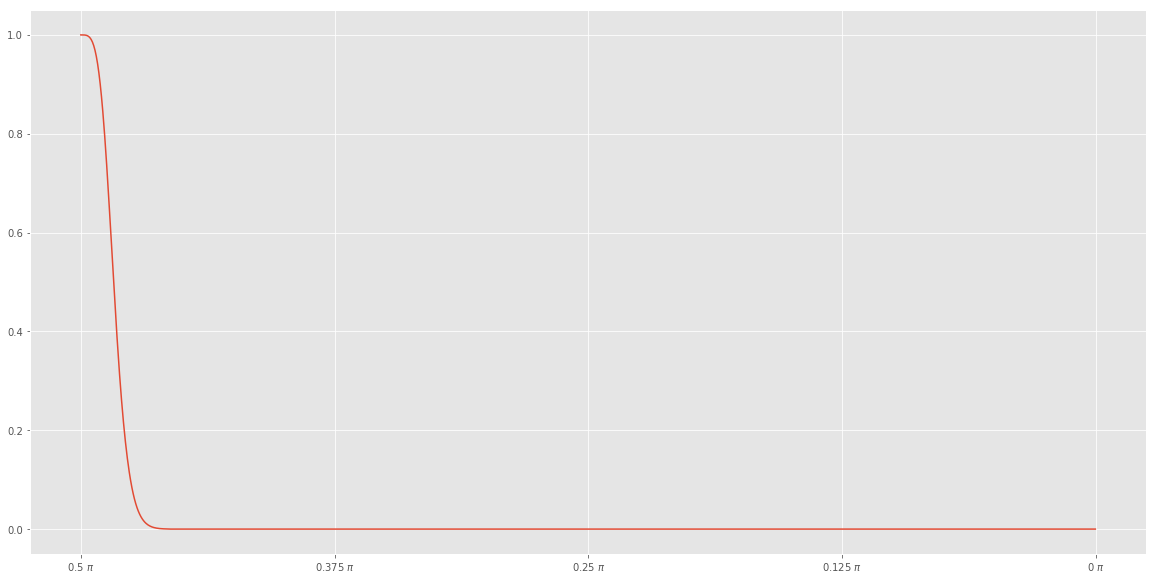

In [74]:
con = []
r = np.arange(pi/2,0,-0.001)
#make GHZ state
state = bell_state()
state = tensor(basis(2), state)
state = cnot(N=3, control=1, target=0) * state

for theta in r:
    m_basis = cos(theta/2)*basis(2) + sin(theta/2)*basis(2,1)
    m_basis = tensor(m_basis, identity(2), identity(2))   #first qubit is the ancilla
    state_after = (m_basis.dag() * state).unit()
    con.append(concurrence(state_after))
    state = cnot(N=3, control=1, target=0) * tensor(basis(2), state_after)
    
f,ax=plt.subplots(figsize=(20,10))
ax.plot(r/np.pi,con)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.set_xlim(ax.get_xlim()[::-1])
plt.style.use("ggplot")
plt.show()

### more real. Outcome state after measurement is probabilistic.

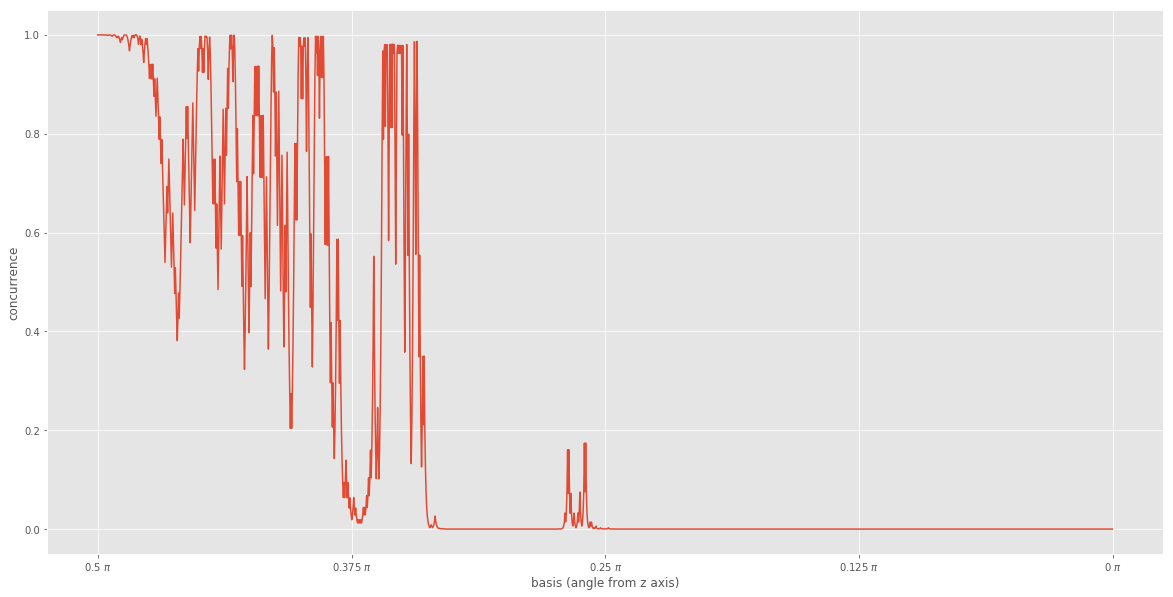

In [95]:
con = []
r = np.arange(pi/2,0,-0.001)
#make GHZ state
state = bell_state()
state = tensor(basis(2), state)
state = cnot(N=3, control=1, target=0) * state

for theta in r:
    m_basis = cos(theta/2)*basis(2) + sin(theta/2)*basis(2,1)
    m_basis_opposite = sin(theta/2)*basis(2) - cos(theta/2)*basis(2,1)
    
    if not np.random.randint(2):   #measurement outcome +1
        m_basis = tensor(m_basis, identity(2), identity(2))   #first qubit is the ancilla
        state_after = (m_basis.dag() * state).unit()
    else:                         #measurement outcome -1
        m_basis_opposite = tensor(m_basis_opposite, identity(2), identity(2))   #first qubit is the ancilla
        state_after = (m_basis_opposite.dag() * state).unit()
 
    con.append(concurrence(state_after))
    state = cnot(N=3, control=1, target=0) * tensor(basis(2), state_after)
    
f,ax=plt.subplots(figsize=(20,10))
ax.plot(r/np.pi,con)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.set_xlim(ax.get_xlim()[::-1])
#plt.style.use("ggplot")
plt.xlabel('basis (angle from z axis)')
plt.ylabel('concurrence')
plt.show()

### another implementation

0
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70675314]
 [ 0.        ]
 [ 0.        ]
 [-0.70746025]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70604533]
 [ 0.        ]
 [ 0.        ]
 [-0.70816664]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70569116]
 [ 0.        ]
 [ 0.        ]
 [ 0.70851958]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70391768]
 [ 0.        ]
 [ 0.        ]
 [ 0.71028156]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70178382]
 [ 0.        ]
 [ 0.        ]
 [ 0.71238997]]
Quantum obj

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.58717014]
 [ 0.        ]
 [ 0.        ]
 [ 0.80946354]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.61597792]
 [ 0.        ]
 [ 0.        ]
 [-0.78776342]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.58678431]
 [ 0.        ]
 [ 0.        ]
 [-0.80974328]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.55713123]
 [ 0.        ]
 [ 0.        ]
 [-0.83042446]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.52725197]
 [ 0.        ]
 [ 0.        ]
 [-0.84970899]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.49738049]
 [ 0.        ]
 [ 0.        ]
 [-0.86753251]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.4677436]
 [ 0.       ]
 [ 0.       ]
 [-0.8838642]]
Quantum object: d

 [-0.90638006]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.375725  ]
 [ 0.        ]
 [ 0.        ]
 [-0.92673121]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.42281378]
 [ 0.        ]
 [ 0.        ]
 [ 0.90621659]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.47342459]
 [ 0.        ]
 [ 0.        ]
 [-0.88083435]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.42246313]
 [ 0.        ]
 [ 0.        ]
 [-0.90638011]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.47379573]
 [ 0.        ]
 [ 0.        ]
 [ 0.88063478]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.42211254]
 [ 0.        ]
 [ 0.        ]
 [ 0.90654344]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.37344773]
 [ 0.        ]
 [ 0.        ]
 [ 0.92765122

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.94065904]
 [ 0.        ]
 [ 0.        ]
 [-0.33935315]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96076208]
 [ 0.        ]
 [ 0.        ]
 [ 0.27737382]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.94054791]
 [ 0.        ]
 [ 0.        ]
 [ 0.33966105]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96083779]
 [ 0.        ]
 [ 0.        ]
 [-0.27711142]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97453594]
 [ 0.        ]
 [ 0.        ]
 [ 0.22423136]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96076204]
 [ 0.        ]
 [ 0.        ]
 [ 0.27737394]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.94010118]
 [ 0.        ]
 [ 0.        ]
 [ 0.34089554]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.93327356]
 [ 0.        ]
 [ 0.        ]
 [ 0.35916634]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96223577]
 [ 0.        ]
 [ 0.        ]
 [-0.27221742]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97909561]
 [ 0.        ]
 [ 0.        ]
 [ 0.20340057]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96216096]
 [ 0.        ]
 [ 0.        ]
 [ 0.27248173]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97913804]
 [ 0.        ]
 [ 0.        ]
 [-0.20319621]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.988657  ]
 [ 0.        ]
 [ 0.        ]
 [ 0.15019098]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97909558]
 [ 0.        ]
 [ 0.        ]
 [ 0.2034007 ]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97534642]
 [ 0.        ]
 [ 0.        ]
 [-0.22067931]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.94980484]
 [ 0.        ]
 [ 0.        ]
 [-0.31284305]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97539727]
 [ 0.        ]
 [ 0.        ]
 [ 0.22045446]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.98821116]
 [ 0.        ]
 [ 0.        ]
 [-0.15309704]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99442063]
 [ 0.        ]
 [ 0.        ]
 [ 0.10548753]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.98818629]
 [ 0.        ]
 [ 0.        ]
 [ 0.15325751]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.97519304]
 [ 0.        ]
 [ 0.        ]
 [ 0.22135615]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.98643393]
 [ 0.        ]
 [ 0.        ]
 [ 0.16415877]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.96755673]
 [ 0.        ]
 [ 0.        ]
 [ 0.25265387]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.92519108]
 [ 0.        ]
 [ 0.        ]
 [ 0.37950161]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.84033872]
 [ 0.        ]
 [ 0.        ]
 [ 0.54206165]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.92533812]
 [ 0.        ]
 [ 0.        ]
 [-0.37914293]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.84006571]
 [ 0.        ]
 [ 0.        ]
 [-0.54248466]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.92548505]
 [ 0.        ]
 [ 0.        ]
 [ 0.37878414]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.09894777]
 [ 0.        ]
 [ 0.        ]
 [ 0.99509263]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.05695913]
 [ 0.        ]
 [ 0.        ]
 [ 0.99837651]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.09906136]
 [ 0.        ]
 [ 0.        ]
 [-0.99508133]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.05689335]
 [ 0.        ]
 [ 0.        ]
 [-0.99838026]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.09917521]
 [ 0.        ]
 [ 0.        ]
 [ 0.99506999]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.17191858]
 [ 0.        ]
 [ 0.        ]
 [-0.98511116]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.09906123]
 [ 0.        ]
 [ 0.        ]
 [-0.99508134]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.1169712 ]
 [ 0.        ]
 [ 0.        ]
 [-0.99313531]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.06298447]
 [ 0.        ]
 [ 0.        ]
 [-0.99801451]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.1171099 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.99311896]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.21542282]
 [ 0.        ]
 [ 0.        ]
 [-0.97652087]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.38187635]
 [ 0.        ]
 [ 0.        ]
 [ 0.92421342]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.21517564]
 [ 0.        ]
 [ 0.        ]
 [ 0.97657536]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.11655498]
 [ 0.        ]
 [ 0.        ]
 [ 0.99318424]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.23560558]
 [ 0.        ]
 [ 0.        ]
 [-0.97184876]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.11878159]
 [ 0.        ]
 [ 0.        ]
 [-0.99292041]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.05885477]
 [ 0.        ]
 [ 0.        ]
 [-0.99826656]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.11892941]
 [ 0.        ]
 [ 0.        ]
 [ 0.99290271]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.05878077]
 [ 0.        ]
 [ 0.        ]
 [ 0.99827092]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.02889755]
 [ 0.        ]
 [ 0.        ]
 [ 0.99958238]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.05885488]
 [ 0.        ]
 [ 0.        ]
 [-0.99826655]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.02949489]
 [ 0.        ]
 [ 0.        ]
 [-0.99956493]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.01349231]
 [ 0.        ]
 [ 0.        ]
 [-0.99990897]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00616216]
 [ 0.        ]
 [ 0.        ]
 [-0.99998101]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.01351017]
 [ 0.        ]
 [ 0.        ]
 [ 0.99990873]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.006154  ]
 [ 0.        ]
 [ 0.        ]
 [ 0.99998106]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.0135281 ]
 [ 0.        ]
 [ 0.        ]
 [-0.99990849]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.02976947]
 [ 0.        ]
 [ 0.        ]
 [ 0.99955679]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.17850804]
 [ 0.        ]
 [ 0.        ]
 [ 0.98393845]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.39722747]
 [ 0.        ]
 [ 0.        ]
 [-0.91772019]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.71887181]
 [ 0.        ]
 [ 0.        ]
 [ 0.69514266]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.92713758]
 [ 0.        ]
 [ 0.        ]
 [-0.3747211 ]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.98606813]
 [ 0.        ]
 [ 0.        ]
 [ 0.16634195]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99753741]
 [ 0.        ]
 [ 0.        ]
 [-0.07013644]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.98602964]
 [ 0.        ]
 [ 0.        ]
 [-0.16656994]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00135554]
 [ 0.        ]
 [ 0.        ]
 [-0.99999908]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  5.15494682e-04]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -9.99999867e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.95741213e-04]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -9.99999981e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  7.42139635e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -9.99999997e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  2.80952913e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  7.43261777e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  9.99999997e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00369307]
 [ 0.        ]
 [ 0.        ]
 [ 0.99999318]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00127695]
 [ 0.        ]
 [ 0.        ]
 [ 0.99999918]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00369906]
 [ 0.        ]
 [ 0.        ]
 [-0.99999316]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.01073234]
 [ 0.        ]
 [ 0.        ]
 [ 0.99994241]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00369305]
 [ 0.        ]
 [ 0.        ]
 [ 0.99999318]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.0107498 ]
 [ 0.        ]
 [ 0.        ]
 [-0.99994222]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.03132972]
 [ 0.        ]
 [ 0.        ]
 [ 0.9995091 ]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99409563]
 [ 0.        ]
 [ 0.        ]
 [-0.10850754]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99941666]
 [ 0.        ]
 [ 0.        ]
 [ 0.03415158]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99994298]
 [ 0.        ]
 [ 0.        ]
 [-0.01067849]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99941461]
 [ 0.        ]
 [ 0.        ]
 [-0.03421158]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99401278]
 [ 0.        ]
 [ 0.        ]
 [-0.10926391]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99941667]
 [ 0.        ]
 [ 0.        ]
 [ 0.03415141]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.99399179]
 [ 0.        ]
 [ 0.        ]
 [ 0.10945463]]
Quantum objec

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.23474099e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  9.07086196e-08]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.24097331e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.16021820e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.23472042e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  9.00106165e-08]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.20870274e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.29770403e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.20181838e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  7.88284819e-08]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.20872905e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.30894403e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  2.41296970e-04]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  9.99999971e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  5.17834322e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  9.99999999e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.10858796e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  5.19102145e-05]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -9.99999999e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  2.43668755e-04]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  9.99999970e-01]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.0011466 ]
 [ 0.        ]
 [ 0.        ]
 [-0.99999934]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.03361067e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  5.53272664e-08]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.04222762e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.67756493e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  3.03356473e-07]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.00000000e+00]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.68236836e-06]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.00000000e+00]]
Quantum object: dims = [[2, 2], [1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  9.99999991e-01]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  1.33199554e-04]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -1.95726442e-05]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  2.86605175e-06]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -4.18216626e-07]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -2.87611592e-06]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[  1.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  4.16748269e-07]]
Quantum object: dims = [[2, 2], [1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dim

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dim

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]
Quantum object: dim

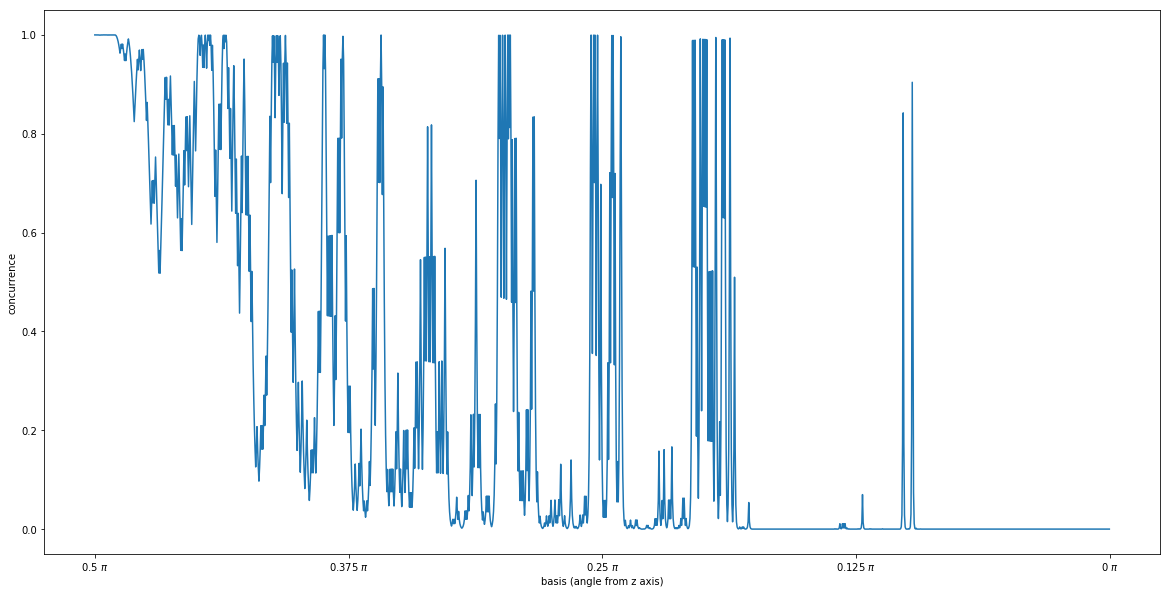

In [4]:
con = []
r = np.arange(pi/2,0,-0.001)
#make GHZ state
state = bell_state()
state = tensor(basis(2), state)   #add ancilla
state = cnot(N=3, control=1, target=0) * state
A = state.ptrace([1,2])

print(concurrence(A))


for theta in r:
    state = ry(theta, N=3, target=0) * state   #rotate to measurement basis
    if not np.random.randint(2):   #measurement outcome +1
        measure_0 = tensor(basis(2).dag(), identity(2), identity(2))   #first qubit is the ancilla
        state_after = (measure_0 * state).unit()
    else:                         #measurement outcome -1
        measure_1 = tensor(basis(2,1).dag(), identity(2), identity(2))   #first qubit is the ancilla
        state_after = (measure_1 * state).unit()
    print(state_after)    
    con.append(concurrence(state_after))
    state = cnot(N=3, control=1, target=0) * tensor(basis(2), state_after)
    
f,ax=plt.subplots(figsize=(20,10))
ax.plot(r/np.pi,con)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.set_xlim(ax.get_xlim()[::-1])
#plt.style.use("ggplot")
plt.xlabel('basis (angle from z axis)')
plt.ylabel('concurrence')
plt.show()

### yet another implementation (this one breaks Python for some reason)

In [ ]:
con = []
r = np.arange(pi/2,0,-0.001)
#make GHZ state
state = bell_state()
state = tensor(basis(2), state)   #add ancilla
state = cnot(N=3, control=1, target=0) * state

for theta in r:
    state = ry(theta, N=3, target=0) * state   #rotate to measurement basis
    state_after = state.ptrace([1,2]).unit()        
    con.append(concurrence(state_after))
    state = cnot(N=3, control=1, target=0) * tensor(basis(2), state_after)
    
f,ax=plt.subplots(figsize=(20,10))
ax.plot(r/np.pi,con)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.125))
ax.set_xlim(ax.get_xlim()[::-1])
#plt.style.use("ggplot")
plt.xlabel('basis (angle from z axis)')
plt.ylabel('concurrence')
plt.show()